### Import Modules/Packages

In [1]:
# pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

### Loading Data from UCI ML library
(https://archive.ics.uci.edu/ml/datasets/student+performance)

In [2]:
df = pd.read_csv("student-mat.csv")
# Since our data is seperated by semicolons we need to do sep=";"

# sanity check
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

### Featute reduction
#### Since we have so many attributes and not all are relevant we need to select the ones we want to use.

In [4]:
df = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]
# Now our data set only has the information associated with those 6 attributes.

df.tail()

,G1,G2,G3,studytime,failures,absences
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0
394,8,9,9,1,0,5


###  statistical details of the dataset

In [5]:
df.describe()

,G1,G2,G3,studytime,failures,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,2.035443,0.334177,5.708861
std,3.319195,3.761505,4.581443,0.839240,0.743651,8.003096
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000,1.000000,0.000000,0.000000
50%,11.000000,11.000000,11.000000,2.000000,0.000000,4.000000
75%,13.000000,13.000000,14.000000,2.000000,0.000000,8.000000
max,19.000000,19.000000,20.000000,4.000000,3.000000,75.000000


### Creatng X, y variables; y = target variable (G3)

In [24]:
X = (df.drop(columns = ['G3'])) # Features
y = (df['G3']) # Labels

### creating train test dataset

In [25]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state=0)

### Regression
The term regression is used when you try to find the relationship between variables. 
In ML, and in statistical modeling, that relationship is used to predict the outcome of future events.

### Linear Regression
Linear regression uses the relationship between the data-points to draw a straight line through all them.
This line can be used to predict future values. So, we see that it is essentially just a best fit line. Given a set of data the algorithm will create a best fit line through those data points.

This line can be defined by the equation 
- y = (mx + b) [in the case of 2 variables]
- y = b0 + m1b1 + m2b2 + m3b3 + ... mnbn [in the case of multiple variables]

here, 

- m is the slope; meaning how much the y value increases for each x value.
- b is the intercept

So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

We can determine the slope(m) of the line by picking two points on the line (p1 and p2) and using the following equation: m = (y2 - y1) / (x2 - x1)

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). 

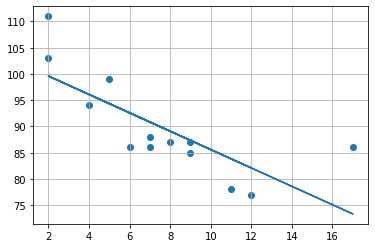

In [26]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def function(x):
    return slope * x + intercept

model = list(map(function, x))

plt.scatter(x, y)
plt.plot(x, model)
plt.grid(True)
plt.show()

It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - the coefficient of correlation - is called r.

The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

Python and the Scipy module will compute this value for you, all we have to do is feed it with the x and y values.

### Implementing the Algorithm

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression()

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.

In [28]:
# To retrieve the intercept:
print(regressor.intercept_)

# For retrieving the slope:
print(regressor.coef_)

-1.4140802869244773
[ 0.12654942  0.99648665 -0.16535373 -0.32266695  0.0429316 ]


In this case (multivariable linear regression), the regression model has to find the most optimal coefficients for all the attributes.

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
G1,0.126549
G2,0.996487
studytime,-0.165354
failures,-0.322667
absences,0.042932


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

### Predictions on Unseen Data

In [30]:
y_pred = regressor.predict(x_test)

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
329,14,13.984090
318,10,10.443255
317,9,9.580054
65,15,15.313166
59,16,16.183103
287,12,11.950430
212,14,12.728132
60,11,10.739649
394,9,8.615999
324,15,15.061949


### Arithmatic error

Arithmatic average of the absolute errors:

|er| = | (y_pred) - (y_test) |

In [33]:
df['error'] = df['Actual'] - df['Predicted'] 
df

,Actual,Predicted,error
329,14,13.984090,0.015910
318,10,10.443255,-0.443255
317,9,9.580054,-0.580054
65,15,15.313166,-0.313166
59,16,16.183103,-0.183103
287,12,11.950430,0.049570
212,14,12.728132,1.271868
60,11,10.739649,0.260351
394,9,8.615999,0.384001
324,15,15.061949,-0.061949


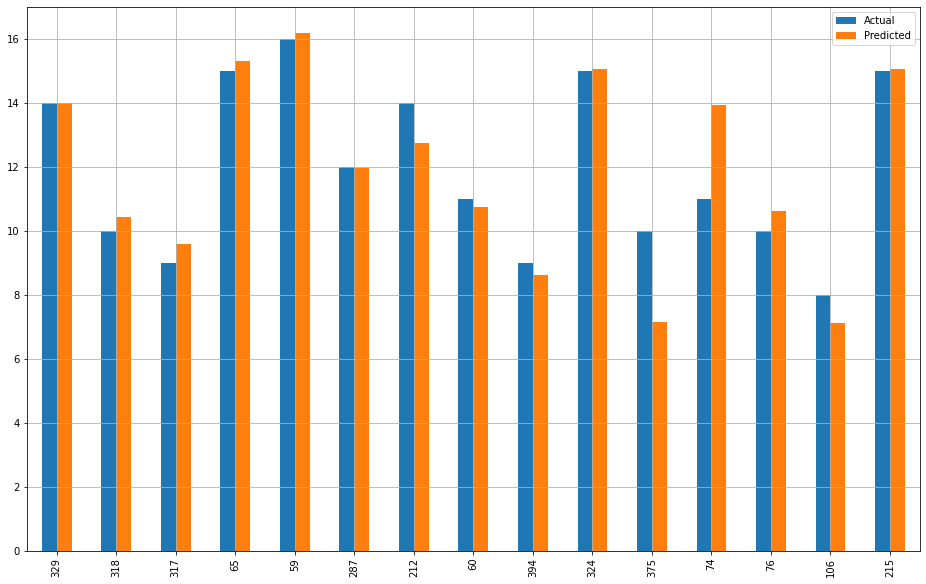

In [34]:
df1 = df[['Actual', 'Predicted']].head(15)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(True)
plt.show()

### Metrics:

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 4.629301183757072
Root Mean Squared Error: 2.151581089282268


### Mean absolute error

In [37]:
sum(df['error'])/40

-0.2786391004016807

In [38]:
df['error'].mean()

-0.2786391004016807